# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basic 4

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 

# images
Table5_1  = "images/Table5-1.png"   # DataFrame 생성자에서 사용 가능한 입력 데이터
Table5_2  = "images/Table5-2.png"   # pandas의 주요 Index 객체
Table5_3  = "images/Table5-3.png"   # Index 메소드와 속성
Table5_4  = "images/Table5-4.png"   # reindex 메소드(보간) 옵션
Table5_5  = "images/Table5-5.png"   # 재색인 함수 인자
Table5_6  = "images/Table5-6.png"   # DataFrame의 값 선택하기
Table5_7  = "images/Table5-7.png"   # 산술연산 메소드
Table5_8  = "images/Table5-8.png"   # 순위의 동률을 처리하는 메소드
Table5_9  = "images/Table5-9.png"   # 축소 메소드 옵션
Table5_10 = "images/Table5-10.png"  # 기술통계와 요약통계
Table5_11 = "images/Table5-11.png"  # 유일값, 값세기, 버리기 메소드
Table5_12 = "images/Table5-12.png"  # NA 처리 메소드
Table5_13 = "images/Table5-13.png"  # fillna 함수 인자


## 4. Handling missing data 
> 누락된 데이터 처리하기 
- pandas의 설계 목표 중 하나는 누락 데이터를 가능한 한 쉽게 처리할 수 있도록 하는 것이다.
- pandas는 누락된 데이터를 실수든 아니든 모두 NaN(Not a Number)으로 취급한다.
- 그래서 누락된 값을 쉽게 찾을 수 있다.

In [196]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [197]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [198]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

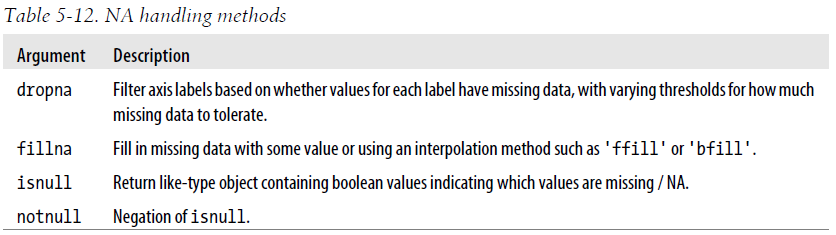

In [199]:
# NA 처리 메소드
reference(Table5_12, 600)

### <font color='brown'> Filtering out missing data </font>
> 누락된 데이터 골라내기
- Series에 대해 dropna 메소드를 적용하면, 실제 데이터가 들어있는 색인값과 Series값으로 반환한다.

In [200]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [201]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [202]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [203]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [204]:
# 모든 값이 NA인 로우만 제외
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [205]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [206]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [207]:
df = DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,-0.146406,-0.282703,-2.246810
1,1.876450,-1.784102,0.114594
2,-0.972331,0.294429,0.373854
3,0.907985,-1.359351,-0.086066
4,-0.833515,0.215354,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [208]:
df.ix[:4, 1] = NA;  df.ix[:2, 2] = NA
df

,0,1,2
0,-0.146406,NaN,NaN
1,1.876450,NaN,NaN
2,-0.972331,NaN,NaN
3,0.907985,NaN,-0.086066
4,-0.833515,NaN,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [209]:
# thresh : 몇 개 이상의 값이 들어있는 로우만 살펴보고 싶을때 넣는 인자 값
df.dropna(thresh=3)

,0,1,2
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [210]:
df.dropna(thresh=2)

,0,1,2
3,0.907985,NaN,-0.086066
4,-0.833515,NaN,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


### <font color='brown'> Filling in missing data </font>
> 누락된 값 채우기

In [211]:
df

,0,1,2
0,-0.146406,NaN,NaN
1,1.876450,NaN,NaN
2,-0.972331,NaN,NaN
3,0.907985,NaN,-0.086066
4,-0.833515,NaN,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [212]:
df.fillna(0)

,0,1,2
0,-0.146406,0.000000,0.000000
1,1.876450,0.000000,0.000000
2,-0.972331,0.000000,0.000000
3,0.907985,0.000000,-0.086066
4,-0.833515,0.000000,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [213]:
# fillna에 사전값을 넣어서 각 칼럼마다 다른값을 채워넣을수도 있다.
df.fillna({1: 0.5, 3: -1})

,0,1,2
0,-0.146406,0.500000,NaN
1,1.876450,0.500000,NaN
2,-0.972331,0.500000,NaN
3,0.907985,0.500000,-0.086066
4,-0.833515,0.500000,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [214]:
# fillna는 값을 채워 넣은 객체의 참조를 반환한다.
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.146406,0.000000,0.000000
1,1.876450,0.000000,0.000000
2,-0.972331,0.000000,0.000000
3,0.907985,0.000000,-0.086066
4,-0.833515,0.000000,-0.789573
5,-0.204006,1.480564,-0.968339
6,0.647085,-0.216240,0.602966


In [215]:
df = DataFrame(np.random.randn(6, 3))
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA
df

,0,1,2
0,0.743303,0.344712,0.704297
1,0.127968,0.872771,0.728772
2,-0.956806,NaN,0.342202
3,-2.551506,NaN,-0.728493
4,-0.073288,NaN,NaN
5,-1.484257,NaN,NaN


In [216]:
df.fillna(method='ffill')

,0,1,2
0,0.743303,0.344712,0.704297
1,0.127968,0.872771,0.728772
2,-0.956806,0.872771,0.342202
3,-2.551506,0.872771,-0.728493
4,-0.073288,0.872771,-0.728493
5,-1.484257,0.872771,-0.728493


In [217]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.743303,0.344712,0.704297
1,0.127968,0.872771,0.728772
2,-0.956806,0.872771,0.342202
3,-2.551506,0.872771,-0.728493
4,-0.073288,NaN,-0.728493
5,-1.484257,NaN,-0.728493


In [218]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

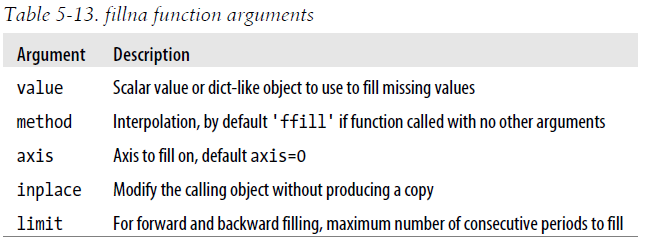

In [219]:
# fillna 함수 인자
reference(Table5_13, 500)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>